<a href="https://colab.research.google.com/github/rahmanziaur/TestGraphTheory/blob/main/2_Pagerank_and_RiskScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx
import numpy as np

df_sc = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/edge.csv')
g_sc = nx.from_pandas_edgelist(df_sc, source='Source', target='Target', edge_attr =None, create_using=nx.DiGraph())
r_g_sc = nx.reverse(g_sc)

#df_pr_risk = pd.read_csv("https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/Reverse_Final_1.6.csv")
#

#df_pr_risk = pd.read_csv('t8.csv')

df_pr_risk = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/rahman/master/final-risk-score-rub.csv')

in_reach = pd.Series([])

#reachability

for k in df_pr_risk['Id']:
    in_reach[k] = len(nx.shortest_path(g_sc, k).keys())

df_pr_risk.insert(len(df_pr_risk.columns), 'In_reach', in_reach)

#reachable_node_list

list_of_reach_node_list = [[] for _ in range(len(df_pr_risk['Id']))]

for k in df_pr_risk['Id']:
  for reach_nodes in nx.shortest_path(g_sc, k).keys():
    list_of_reach_node_list[k].append(reach_nodes)

#Agg_RS

score = pd.Series([])
score20 = pd.Series([])
score30 = pd.Series([])
score50 = pd.Series([])

for row in list_of_reach_node_list:
  sum=0
  sum20 = 0
  sum30 = 0
  sum50 = 0

  for node_id in row:
    if np.isnan(df_pr_risk['FinalRiskScore'][node_id]):
      continue

    sum = sum + df_pr_risk['FinalRiskScore'][node_id]

    if df_pr_risk['FinalRiskScore'][node_id] >= 0.20:
      sum20 = sum20 + df_pr_risk['FinalRiskScore'][node_id]

    if df_pr_risk['FinalRiskScore'][node_id] >= 0.30:
      sum30 = sum30 + df_pr_risk['FinalRiskScore'][node_id]

    if df_pr_risk['FinalRiskScore'][node_id] >= 0.50:
      sum50 = sum50 + df_pr_risk['FinalRiskScore'][node_id]


  score[row[0]] = sum
  score20[row[0]] = sum20
  score30[row[0]] = sum30
  score50[row[0]] = sum50

df_pr_risk.insert(len(df_pr_risk.columns),'Agg_RS)', score)
df_pr_risk.insert(len(df_pr_risk.columns),'Agg_RS20)', score20)
df_pr_risk.insert(len(df_pr_risk.columns),'Agg_RS30)', score30)
df_pr_risk.insert(len(df_pr_risk.columns),'Agg_RS50)', score50)
df_pr_risk.to_csv('Agg_RS_full_1.csv')


<ipython-input-1-3d982a8b78b6>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  in_reach = pd.Series([])
<ipython-input-1-3d982a8b78b6>:35: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  score = pd.Series([])
<ipython-input-1-3d982a8b78b6>:36: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  score20 = pd.Series([])
<ipython-input-1-3d982a8b78b6>:37: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  score30 = pd.Series([])
<ipython-input-1-3d982a8b78b6>:38: FutureWarning: The default dtype for empty Series will be 'object' instead of 

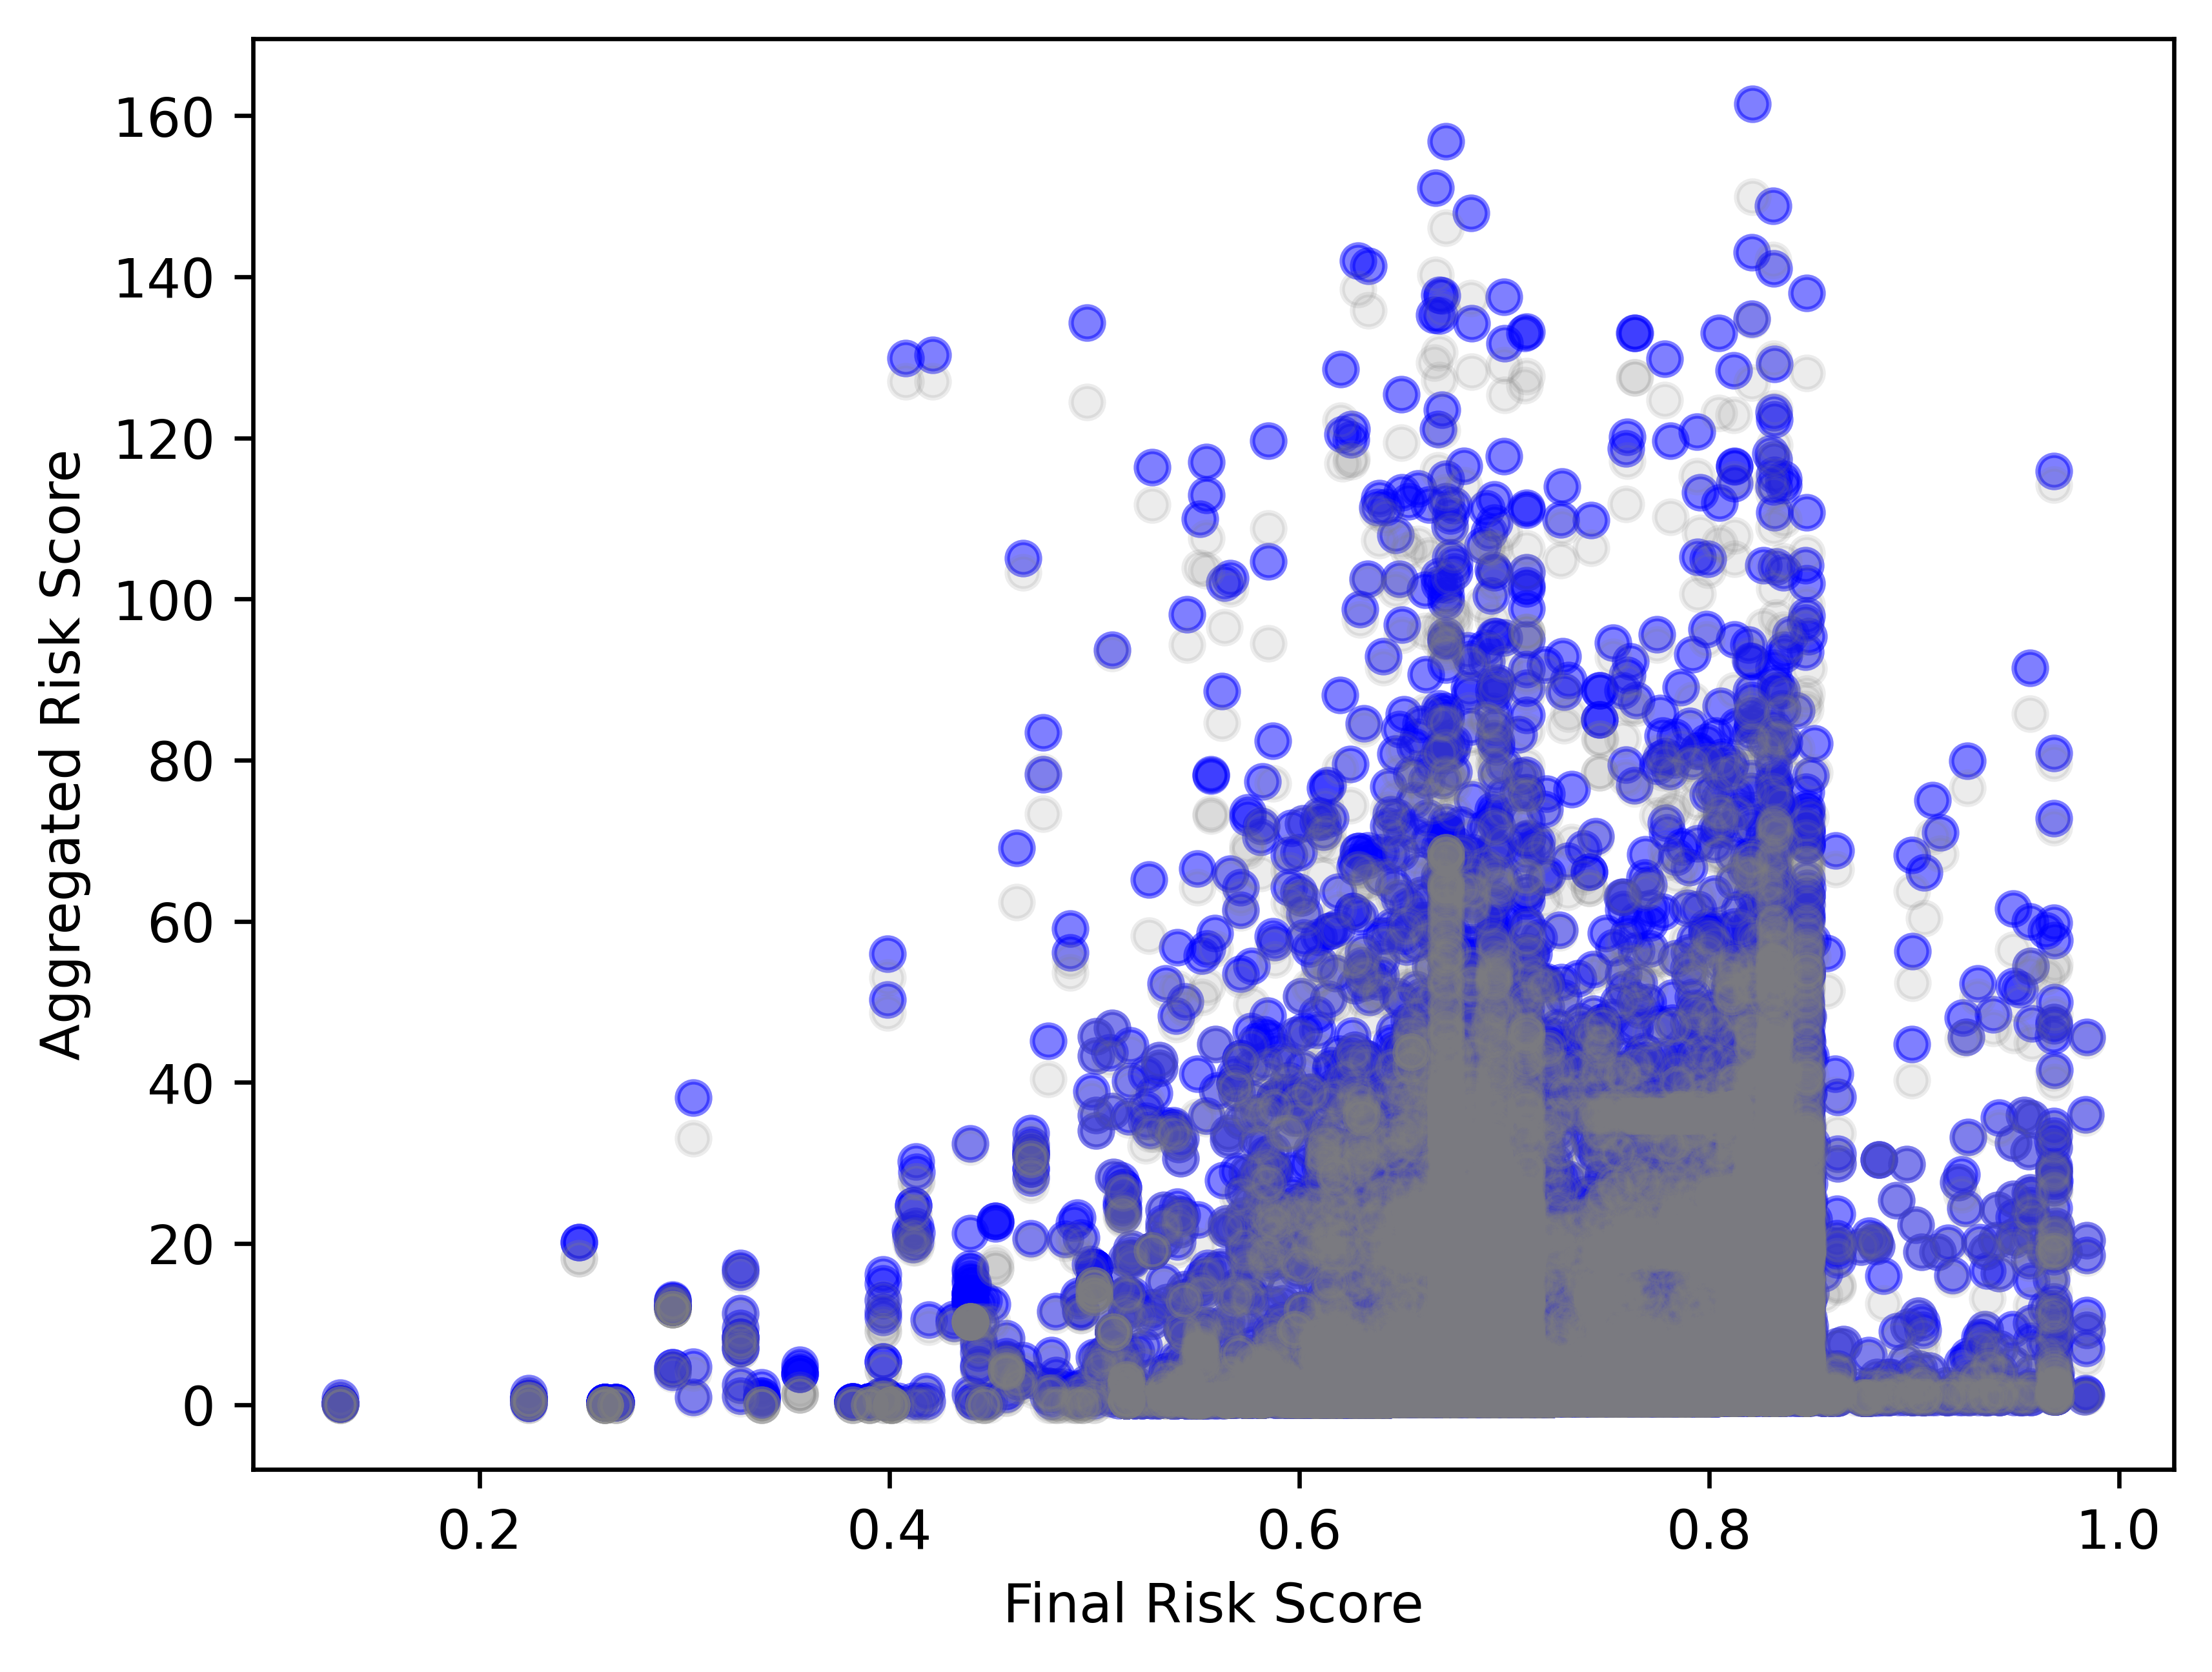

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(num=None, dpi=600, facecolor='w', edgecolor='b')

#df1 = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/Reverse_Final_1.6.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/Agg_RS_full_1.csv')

#df1['Cat'] = np.where(df1['FinalRiskScore'] > 0.5,'red', 'green')
#df1['PR_Category'] = np.where(df1['Out_reach'] > 4200,'D', 'T')

#sizes = df1['Degree']/3


plt.scatter(df1['FinalRiskScore'], df1['Agg_RS)'], c='blue', alpha=0.5)
plt.scatter(df1['FinalRiskScore'], df1['Agg_RS50)'], c='grey', alpha=0.15)
#[plt.text(x=row['FinalRiskScore'], y=row['Out_reach'], s="["+str(row['Id'])+"] : "+row['Label'].split('-')[0]+row['Label'].split('-')[1], fontsize=10) for k,row in df1.iterrows() if 'D' in row.PR_Category]
#plt.axvline(x = .5, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
#plt.axhline(y = 80, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')
plt.xlabel('Final Risk Score')
plt.ylabel('Aggregated Risk Score')

plt.savefig('score-vs-ag_score-0.png')
plt.show()

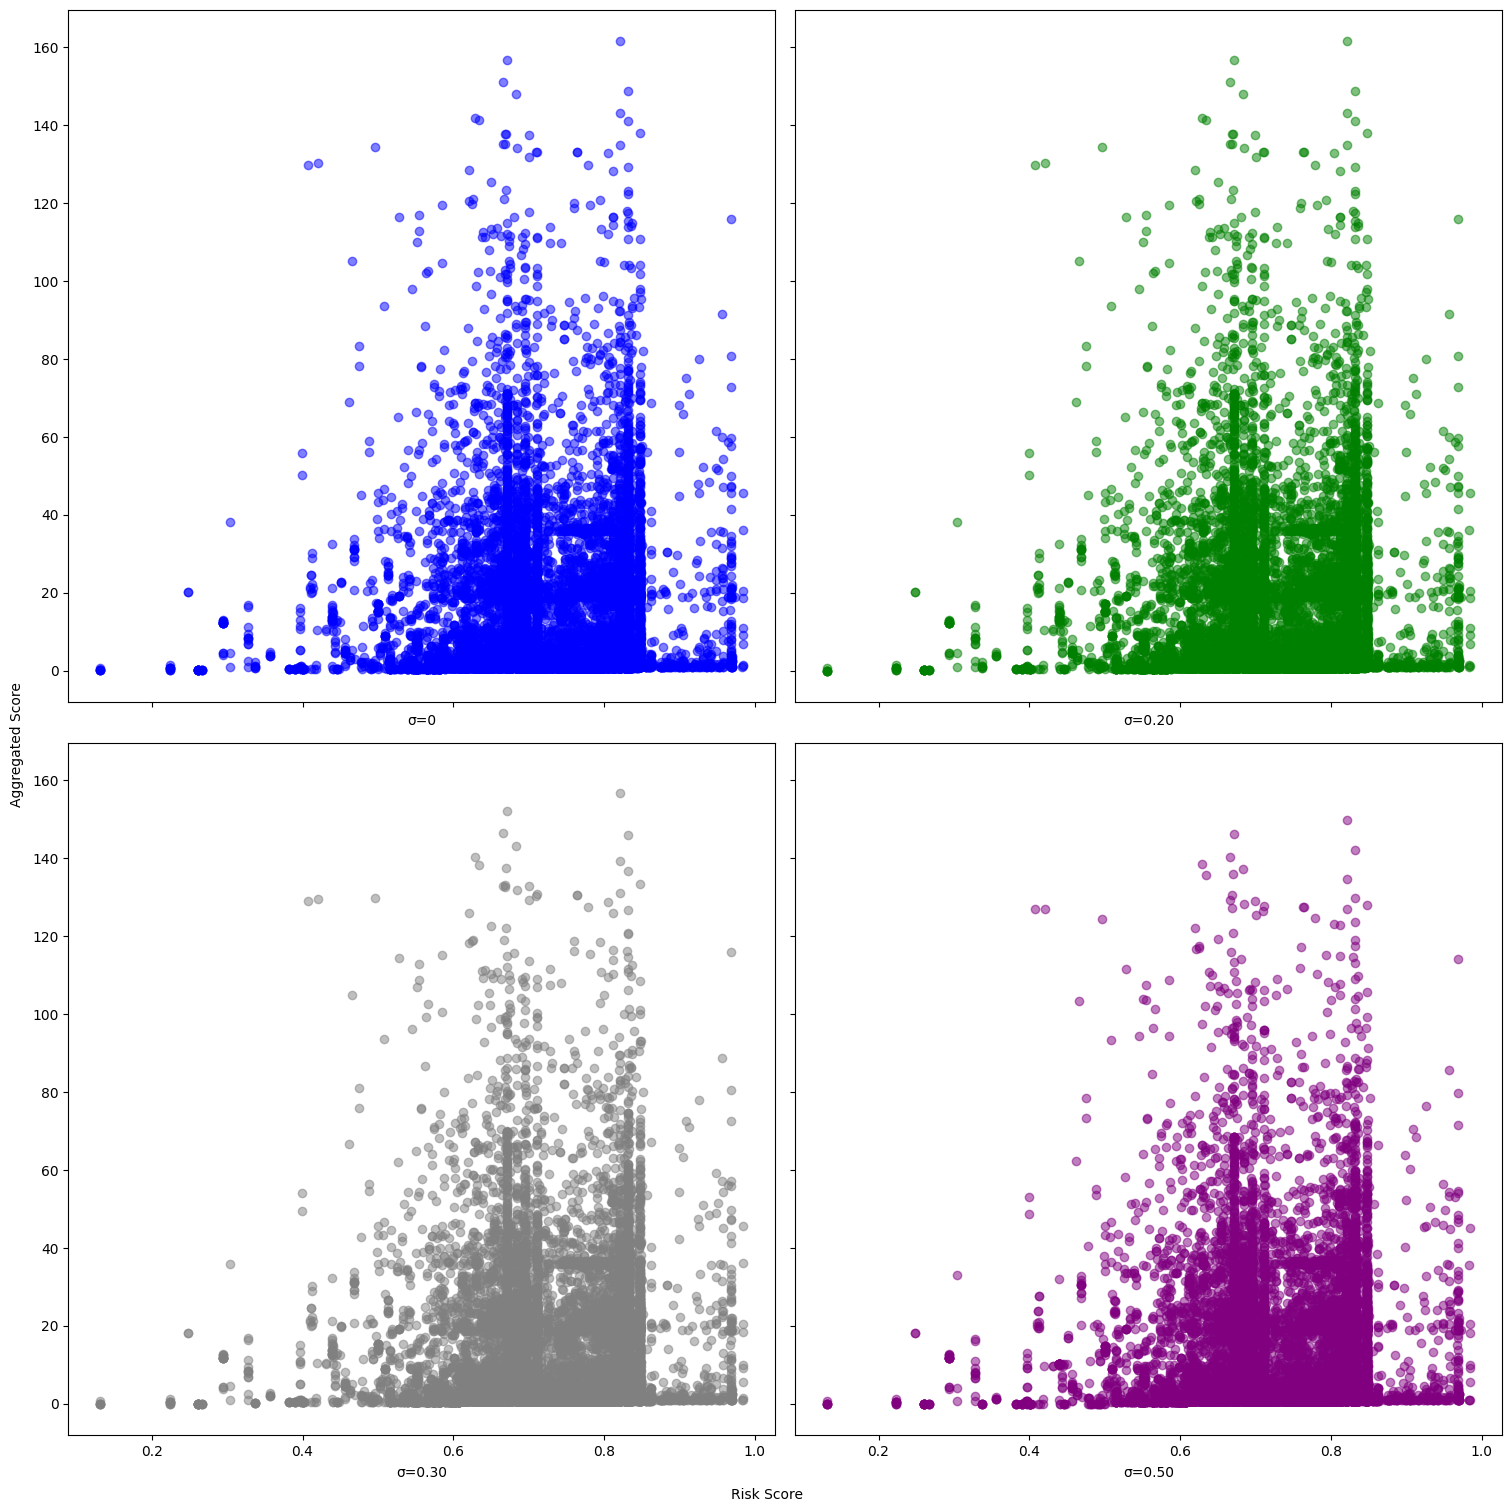

In [33]:
import matplotlib.pyplot as plt
import numpy
import random
import warnings

df1 = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/Agg_RS_full_1.csv')

#,Agg_RS20),Agg_RS30),Agg_RS50)

x = df1['FinalRiskScore']
y_a_rs = df1['Agg_RS)']
y_a_rs20 = df1['Agg_RS20)']
y_a_rs30 = df1['Agg_RS30)']
y_a_rs50 = df1['Agg_RS50)']


f, axes = plt.subplots(nrows = 2, ncols = 2,  figsize=(15, 15), sharex=True, sharey = True)

axes[0][0].scatter(x,y_a_rs,c='blue', marker = "o", alpha=0.5)
axes[0][0].set_xlabel('\u03C3=0', labelpad = 5)

axes[0][1].scatter(x,y_a_rs20,c='green', marker = "o", alpha=0.5)
axes[0][1].set_xlabel('\u03C3=0.20', labelpad = 5)

axes[1][0].scatter(x,y_a_rs30,c='grey', marker = "o", alpha=0.5)
axes[1][0].set_xlabel('\u03C3=0.30', labelpad = 5)

axes[1][1].scatter(x,y_a_rs50,c='purple', marker = "o", alpha=0.5)
axes[1][1].set_xlabel('\u03C3=0.50', labelpad = 5)

f.text(0.5, 0, 'Risk Score', ha='center', va='center')
f.text(0, 0.5, 'Aggregated Score', ha='center', va='center', rotation='vertical')

plt.tight_layout()
#plt.savefig('CompareScatter1.png', dpi=1200, facecolor='w', edgecolor='b',transparent=True)
plt.show()

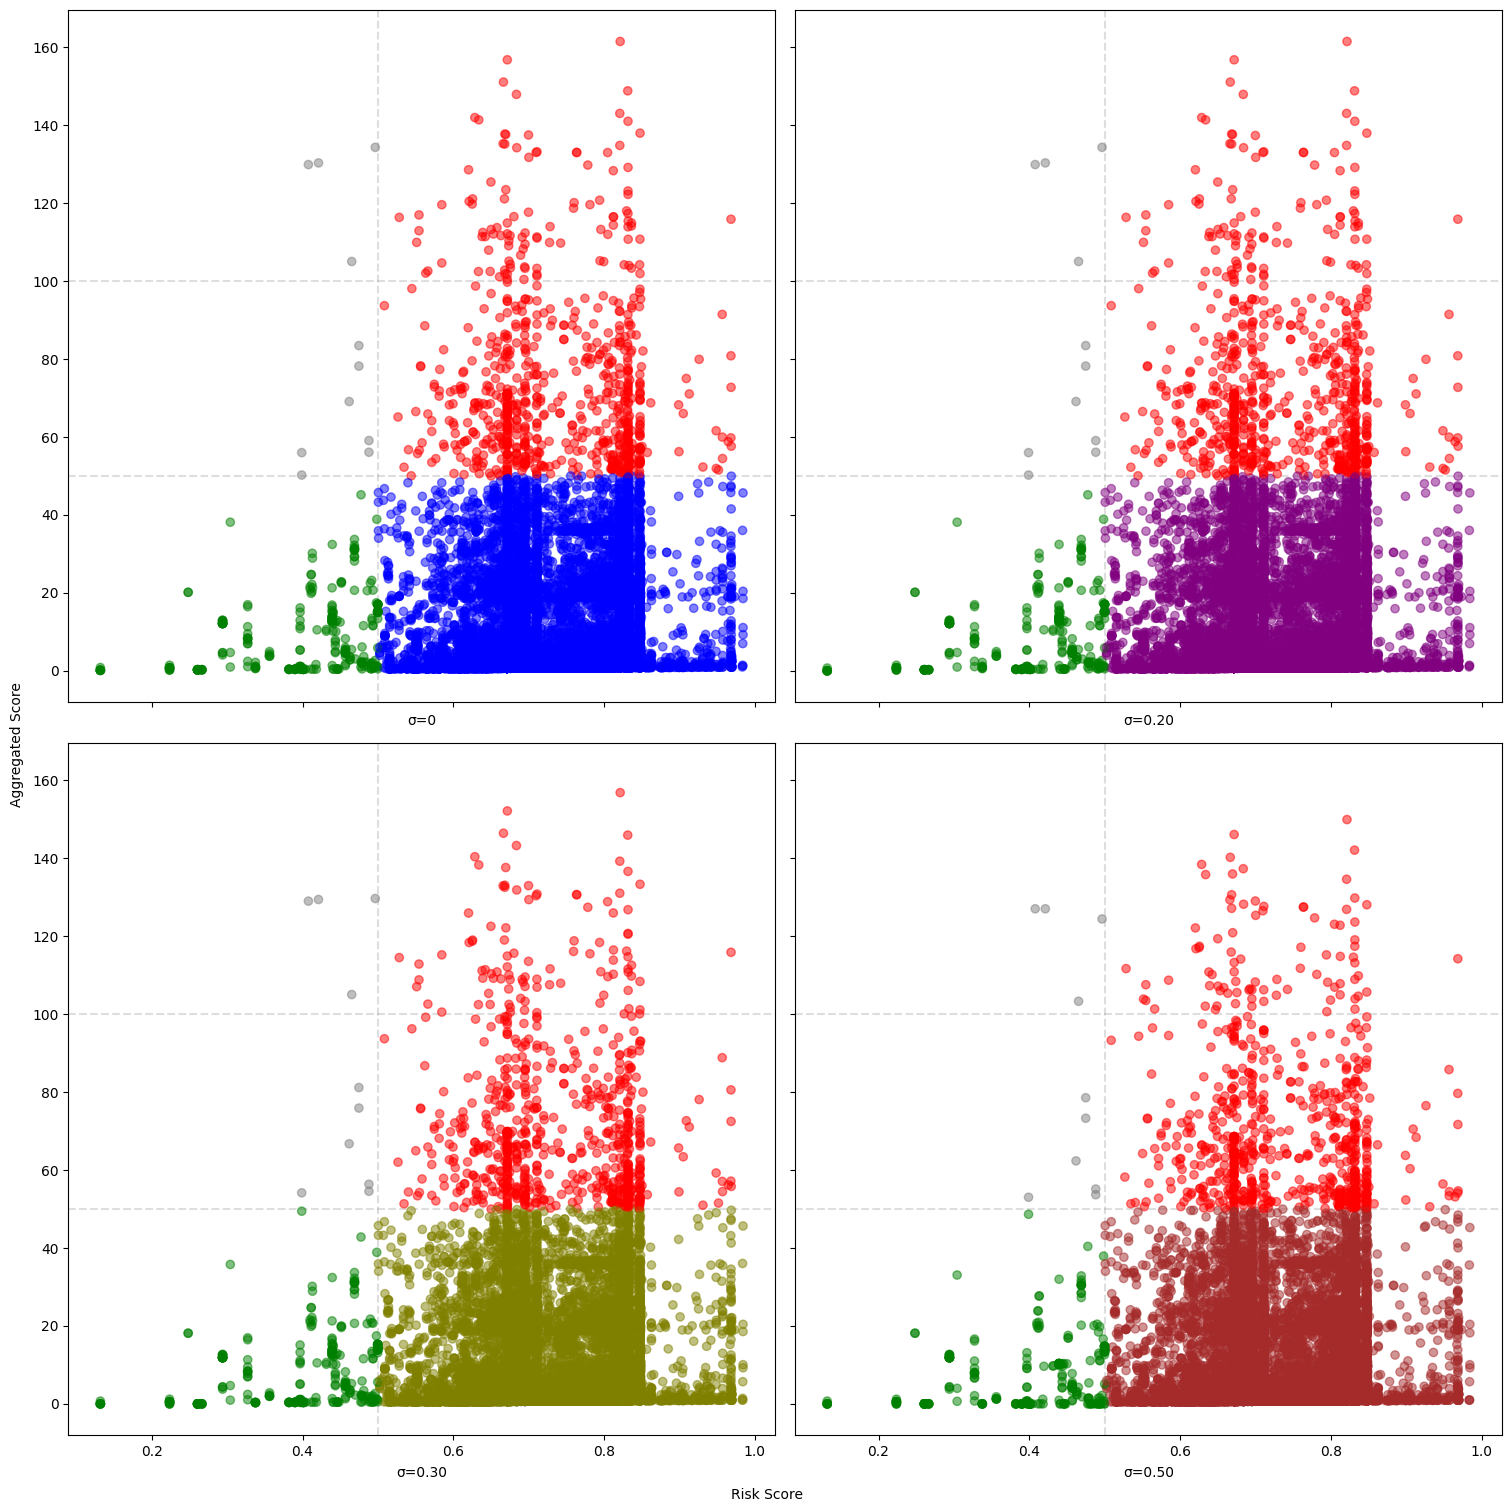

In [44]:
import matplotlib.pyplot as plt
import numpy
import random
import warnings

df1 = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/Agg_RS_full_1.csv')

#,Agg_RS20),Agg_RS30),Agg_RS50)

x = df1['FinalRiskScore']
y_a_rs = df1['Agg_RS)']
y_a_rs20 = df1['Agg_RS20)']
y_a_rs30 = df1['Agg_RS30)']
y_a_rs50 = df1['Agg_RS50)']


col1 = 'FinalRiskScore'
col2 = 'Agg_RS)'
col3 = 'Agg_RS20)'
col4 = 'Agg_RS30)'
col5 = 'Agg_RS50)'

GREY50 = "#7F7F7F"

df1['Cat0'] = np.where(df1[col1] >=.5, (np.where(df1[col2] >= 50, 'red', 'blue')), (np.where(df1[col2] >= 50, GREY50, 'green')))
df1['Cat20'] = np.where(df1[col1] >=.5, (np.where(df1[col3] >= 50, 'red', 'purple')), (np.where(df1[col3] >= 50, GREY50, 'green')))
df1['Cat30'] = np.where(df1[col1] >=.5, (np.where(df1[col4] >= 50, 'red', 'olive')), (np.where(df1[col4] >= 50, GREY50, 'green')))
df1['Cat50'] = np.where(df1[col1] >=.5, (np.where(df1[col5] >= 50, 'red', 'brown')), (np.where(df1[col5] >= 50, GREY50, 'green')))

f, axes = plt.subplots(nrows = 2, ncols = 2,  figsize=(15, 15), sharex=True, sharey = True)

axes[0][0].scatter(x,y_a_rs,c=df1['Cat0'], marker = "o", alpha=0.5)
axes[0][0].set_xlabel('\u03C3=0', labelpad = 5)
axes[0][0].axvline(x = .5, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
axes[0][0].axhline(y = 50, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')
#axes[0][0].axvline(x = .20, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
axes[0][0].axhline(y = 100, color = GREY50, alpha=0.25, zorder=0, linestyle="--")

#axes[0][0].axhline(y = 25, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')

axes[0][1].scatter(x,y_a_rs20,c=df1['Cat20'], marker = "o", alpha=0.5)
axes[0][1].set_xlabel('\u03C3=0.20', labelpad = 5)
axes[0][1].axvline(x = .5, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
axes[0][1].axhline(y = 50, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')
#axes[0][1].axvline(x = .20, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
axes[0][1].axhline(y = 100, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
#axes[0][1].axhline(y = 25, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')

axes[1][0].scatter(x,y_a_rs30,c=df1['Cat30'], marker = "o", alpha=0.5)
axes[1][0].set_xlabel('\u03C3=0.30', labelpad = 5)
axes[1][0].axvline(x = .5, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
axes[1][0].axhline(y = 50, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')
#axes[1][0].axvline(x = .20, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
axes[1][0].axhline(y = 100, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
#axes[1][0].axhline(y = 25, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')

axes[1][1].scatter(x,y_a_rs50,c=df1['Cat50'], marker = "o", alpha=0.5)
axes[1][1].set_xlabel('\u03C3=0.50', labelpad = 5)
axes[1][1].axvline(x = .5, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
axes[1][1].axhline(y = 50, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')
#axes[1][1].axvline(x = .20, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
axes[1][1].axhline(y = 100, color = GREY50, alpha=0.25, zorder=0, linestyle="--")
#axes[1][1].axhline(y = 25, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')

f.text(0.5, 0, 'Risk Score', ha='center', va='center')
f.text(0, 0.5, 'Aggregated Score', ha='center', va='center', rotation='vertical')

plt.tight_layout()
#plt.savefig('CompareScatter1.png', dpi=1200, facecolor='w', edgecolor='b',transparent=True)
plt.show()

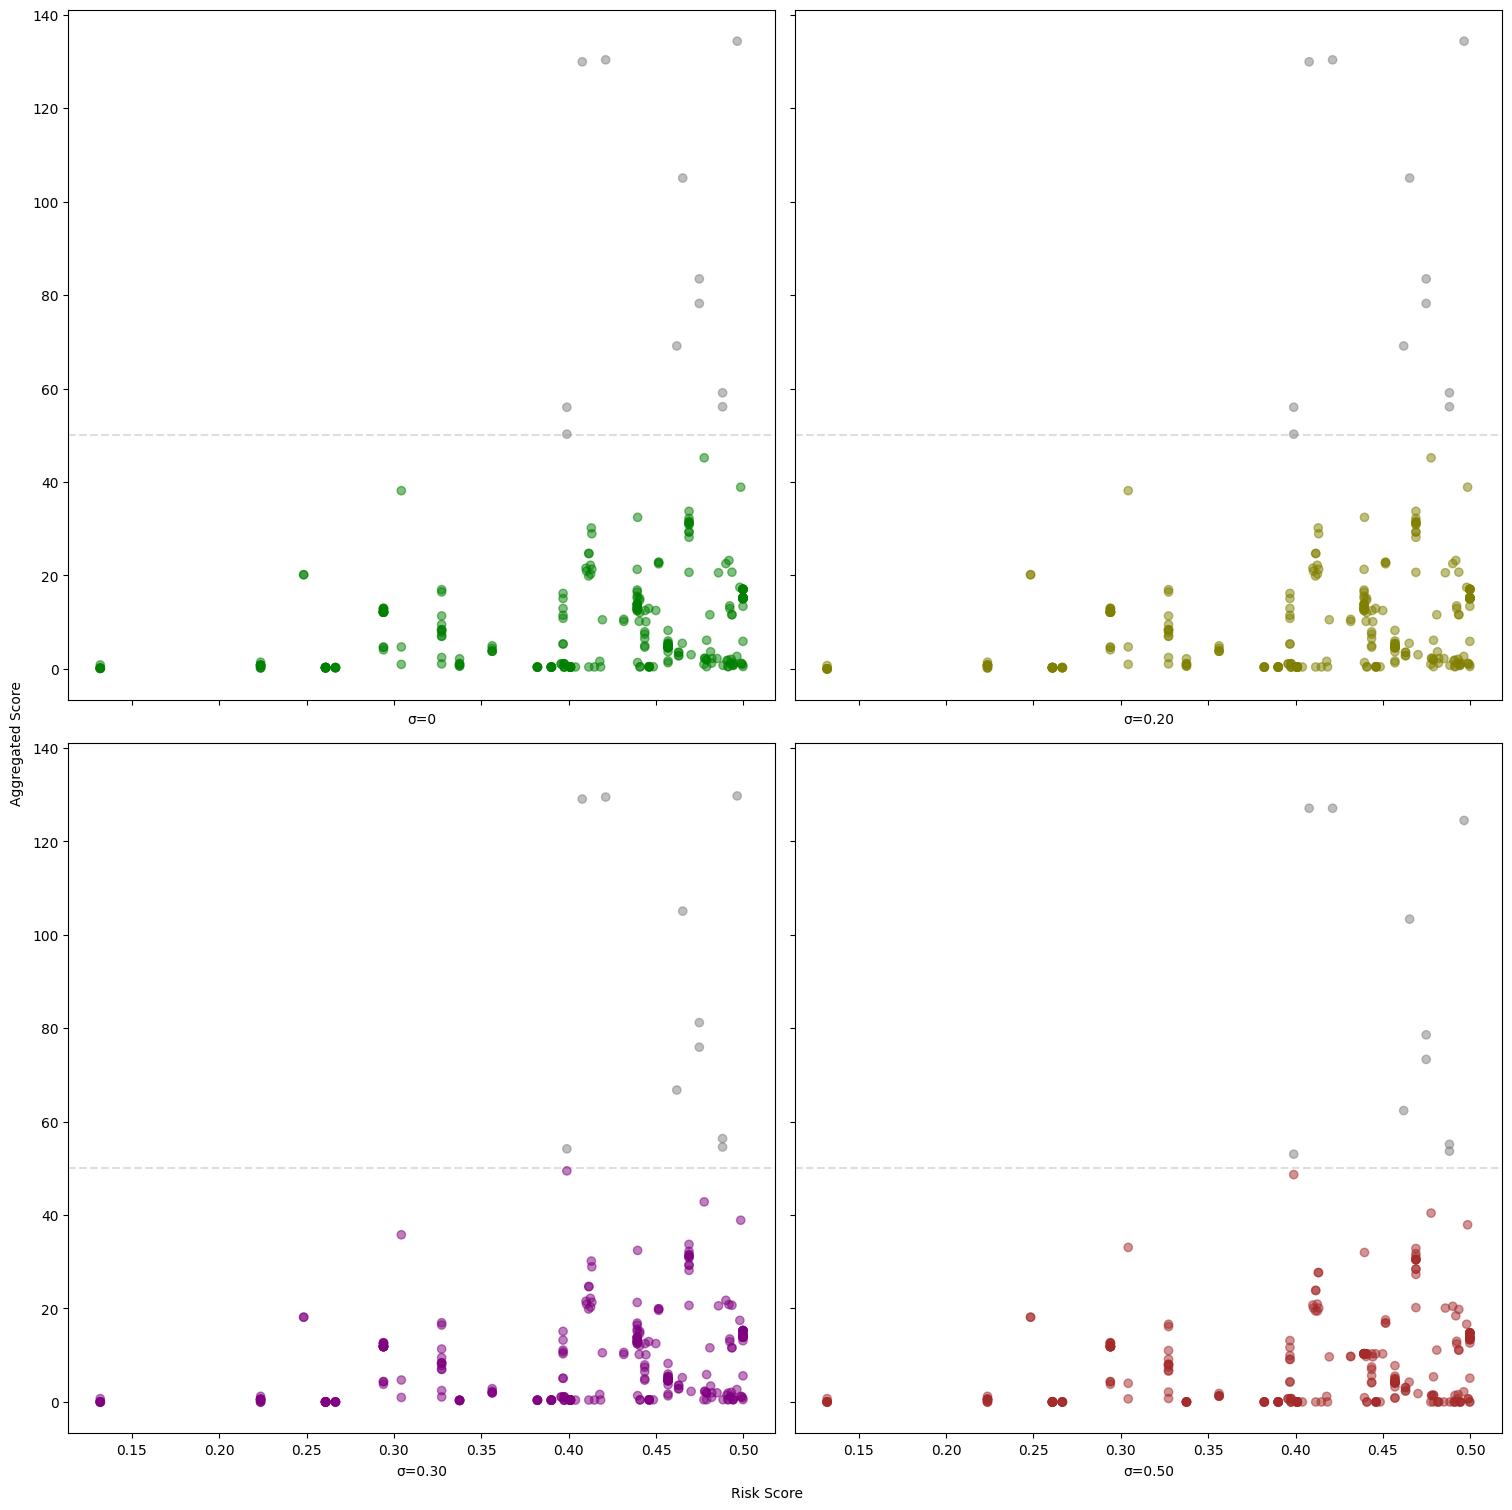

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df1 = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/Agg_RS_full_1.csv')

df2 = df1[df1['FinalRiskScore'] < .5]

x = df2['FinalRiskScore']
y_a_rs = df2['Agg_RS)']
y_a_rs20 = df2['Agg_RS20)']
y_a_rs30 = df2['Agg_RS30)']
y_a_rs50 = df2['Agg_RS50)']


df2['Cat0'] = np.where(df2['Agg_RS)'] > 50, '#7F7F7F', 'green')
df2['Cat20'] = np.where(df2['Agg_RS20)'] > 50, '#7F7F7F', 'olive')
df2['Cat30'] = np.where(df2['Agg_RS30)'] > 50, '#7F7F7F', 'purple')
df2['Cat50'] = np.where(df2['Agg_RS50)'] > 50, '#7F7F7F', 'brown')

sizes = df2['In_reach']*2.5


f, axes = plt.subplots(nrows = 2, ncols = 2,  figsize=(15, 15), sharex=True, sharey = True)

axes[0][0].scatter(x,y_a_rs,c=df2['Cat0'], marker = "o", alpha=0.5)
axes[0][0].set_xlabel('\u03C3=0', labelpad = 5)
axes[0][0].axhline(y = 50, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')


axes[0][1].scatter(x,y_a_rs20,c=df2['Cat20'], marker = "o", alpha=0.5)
axes[0][1].set_xlabel('\u03C3=0.20', labelpad = 5)
axes[0][1].axhline(y = 50, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')


axes[1][0].scatter(x,y_a_rs30,c=df2['Cat30'], marker = "o", alpha=0.5)
axes[1][0].set_xlabel('\u03C3=0.30', labelpad = 5)
axes[1][0].axhline(y = 50, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')


axes[1][1].scatter(x,y_a_rs50,c=df2['Cat50'], marker = "o", alpha=0.5)
axes[1][1].set_xlabel('\u03C3=0.50', labelpad = 5)
axes[1][1].axhline(y = 50, color = GREY50, alpha=0.25, zorder=0, linestyle = '--')


f.text(0.5, 0, 'Risk Score', ha='center', va='center')
f.text(0, 0.5, 'Aggregated Score', ha='center', va='center', rotation='vertical')

plt.tight_layout()
#plt.savefig('CompareScatter1.png', dpi=1200, facecolor='w', edgecolor='b',transparent=True)
plt.show()